# 차원이 많은 데이터의 장점
데이터에서 '차원'이란 변수의 개수를 의미합니다. 변수가 1개인 데이터는 1차원 데이터, 2개인 데이터는 2차원 데이터, n개인 데이터는 n차원 데이터라고 부릅니다. 예를 들어서, 아래와 같은 고객 정보 데이터가 있다고 해 볼게요.

In [9]:
import pandas as pd

user = pd.read_csv('data/custom_data.csv')
user.head(10)

,recency,age,children,spent_all,purchase_num_all,family_size
0,58,66,0,1617,25,1
1,38,69,2,27,6,3
2,26,58,0,776,21,2
3,26,39,1,53,8,3
4,94,42,1,422,19,3
5,16,56,1,716,22,3
6,34,52,1,590,21,2
7,32,38,1,169,10,3
8,19,49,1,46,6,3
9,68,73,2,49,2,4


recency: 최근 구매일로부터 경과일   
age: 나이   
children: 자녀 명수   
spent_all: 총 구매 금액   
purchase_num_all: 총 구매 횟수   
family_size: 총 가족 구성원 수   

만약에 recency와 age라는 2개의 변수만 가지고 있는 2차원 데이터라면 자녀 명수, 총 구매 금액, 총 구매 횟수, 총 가족 구성원 수 등의 정보가 누락됩니다. recency, age, children, spent_all까지 4차원으로 구성된 데이터는 총 구매 횟수, 총 가족 구성원 수 정보가 없죠. 반면, 6개의 변수가 모두 포함된 6차원의 데이터라면 차원이 낮은 데이터보다 좀 더 많은 정보를 가지게 됩니다. 따라서, 차원이 높은 데이터를 분석에 활용하면 더 많은 정보를 반영한 결과를 얻을 수 있습니다.

# 차원의 저주란?
데이터의 차원이 높아지면 좀 더 많은 정보를 나타낼 수 있습니다. 때문에, 데이터에 있는 변수가 많으면 많을수록 무조건 좋은 거라고 생각할 수 있는데요. 그렇지 않습니다. 오히려 데이터의 차원이 너무 많아지면 분석의 정확도가 떨어지는 경우도 있습니다. 이런 현상을 차원의 저주라고 합니다

차원의 저주가 발생하는 상황을 직접 확인하기 위해 user 데이터의 클러스터링 결과를 차원의 수에 따라 비교해 보겠습니다. 클러스터링에는 k-means 방법을 사용할게요.     
먼저, 6차원 데이터로 클러스터 개수 k를 1부터 9까지 바꿔가며 모델을 학습시킨 결과의 성능 지표인 inertia를 시각화한 그래프입니다.

<Axes: >

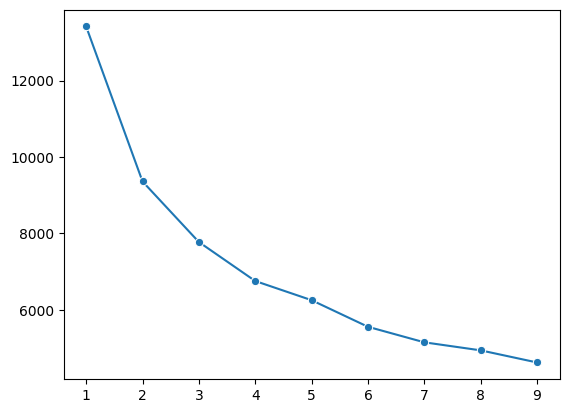

In [10]:
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt

# 데이터 스케일링
user_mean = user.mean()  # 각 컬럼의 평균값
user_std = user.std()    # 각 컬럼의 표준편차
scaled_df = (user - user_mean)/user_std  # 컬럼별 표준화 진행 

# 클러스터링
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(scaled_df)
    inertias.append(model.inertia_)

# 시각화
sns.lineplot(x=ks, y=inertias, marker='o')

다음으로, 6개의 차원을 2개 차원 축소시킨 후에 다시 k-means를 적용해 보겠습니다. 차원을 줄이는 데에는 PCA라는 방법을 쓸 건데요.   
PCA는 고차원 데이터를 저차원으로 변환하여 주요 패턴을 추출하는 차원 축소 기법입니다.

## PCA의 동작 과정
1. 데이터 표준화 및 원점 이동
- 단위 통일 및 데이터의 중심 지점이 원점이 되도록 위치 이동

2. 주성분 찾기
- 주성분: 데이터들의 중심(원점)을 지나면서 모든 데이터들에서의 수직 거리의 합이 가장 가깝도록 하는 선

3. 데이터 투영하기
- 투영: 쉽게 얘기해서 데이터들을 주성분 위로 옮기는 과정을 의미

4. 새로운 축 기준으로 데이터 회전하기
- 새롭게 만들어진 변수인 첫 번째 주성분(PC1)과 두 번째 주성분(PC2)이 각각 x축과 y축이 될 수 있도록 축과 데이터 전체를 회전
- 만약에 2차원인 데이터를 1차원으로 줄이고 싶다면 PC1만을 사용해서 데이터를 나타내면 됩니다.
- 2차원으로 나타내려면 PC1과 PC2 두 개의 축으로 이루어진 좌표 평면에 데이터들을 표현

<Axes: >

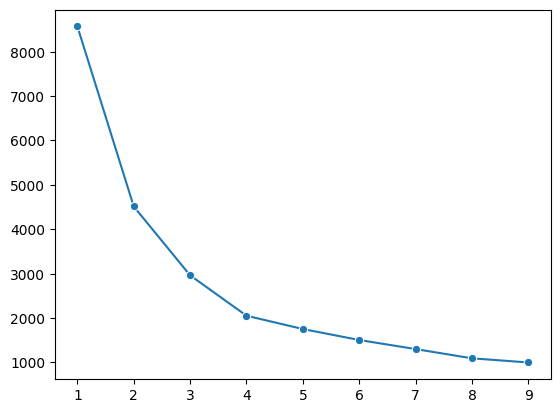

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  #n_components : 유지할 차원의 갯수

# PCA 적용
pca.fit(scaled_df)
scaled_df_pca = pca.transform(scaled_df)
pca_df = pd.DataFrame(scaled_df_pca)

# 클러스터링
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(pca_df)
    inertias.append(model.inertia_)

# 시각화
sns.lineplot(x=ks, y=inertias, marker='o')

#### 차원 축소 전후 그래프 비교
두 그래프를 비교해 보면, 차원이 2개인 데이터로 클러스터링 한 결과가 차원이 6개인 데이터로 클러스터링 한 결과보다 모든 클러스터 개수 k에서 inertia 값이 작은 것을 알 수 있습니다. 즉, 차원의 개수가 더 작을수록 클러스터링의 결과로 모인 데이터들이 더 많이 유사하고, 성능이 좋게 나오는 것이죠.

# 차원 축소
차원의 저주를 해결하는 대표적인 방법으로 차원 축소(Dimensionality Reduction)가 있습니다. 차원 축소란, 데이터에 있는 차원(변수)의 숫자를 줄여서 차원의 저주 문제를 해결하는 기법인데요. 이전 레슨에서 6개 변수로 된 데이터를 2개 변수로 줄여서 k-means를 한 것도 모델의 성능을 좀 더 좋게 하기 위하여 차원 축소가 활용된 것입니다.

## 차원 선택
첫 번째는 전체 차원 중 의미 있다고 판단되는 것들만 선택해서 사용하는 차원 선택이란 방법입니다. 차원 선택 적용할 때는 변수 중 무엇이 중요한지, 의미상 중복되는 것들이 있는지 등을 확인해야 합니다. 이전 레슨에서 활용한 user 데이터를 예시로 차원 선택을 해봅시다.

In [12]:
user.head(10)

,recency,age,children,spent_all,purchase_num_all,family_size
0,58,66,0,1617,25,1
1,38,69,2,27,6,3
2,26,58,0,776,21,2
3,26,39,1,53,8,3
4,94,42,1,422,19,3
5,16,56,1,716,22,3
6,34,52,1,590,21,2
7,32,38,1,169,10,3
8,19,49,1,46,6,3
9,68,73,2,49,2,4


생각해 보면 자녀가 있는 집은 그렇지 않은 집보다 가족 구성원 수가 좀 더 많겠죠? 이렇게 의미상 중복이 되는 경우에는 두 변수 중 하나를 제거하여 차원을 줄일 수 있습니다. children이라는 변수를 제거해 볼게요.

In [13]:
user = user.drop('children', axis = 1)
user.head(10)

,recency,age,spent_all,purchase_num_all,family_size
0,58,66,1617,25,1
1,38,69,27,6,3
2,26,58,776,21,2
3,26,39,53,8,3
4,94,42,422,19,3
5,16,56,716,22,3
6,34,52,590,21,2
7,32,38,169,10,3
8,19,49,46,6,3
9,68,73,49,2,4


예시에서는 대략적으로 변수 간 의미를 통해 탈락시킬 변수를 선택했는데요. 실제로는 변수 간의 관계를 면밀히 확인하여 제거할 변수를 판단해야 합니다. 이렇게, 변수들 간의 관계를 통해 덜 중요하거나 불필요한 변수를 찾아 데이터에서 빼는 작업을 차원 선택이라고 합니다.

## 차원선택의 장단점
#### 장점
차원 선택의 가장 큰 장점은 사용이 쉽다는 점입니다. 단순히 제거할 변수를 직관적으로 판단하고 선택하면 되기 때문에 쉽고 빠르게 적용할 수 있습니다. 또한, 각 변수들의 특성이 유지되면서 차원을 줄이기 때문에 결과를 이해하고 해석하기 쉽다는 장점도 있습니다.
#### 단점
차원 선택의 단점은 정보 손실이 커진다는 점인데요. 데이터에서 탈락시킨 변수들은 분명 이유가 있겠지만, 그래도 전체 데이터에서 해당 변수만으로 설명되는 정보가 분명 존재할 수 있습니다. 위의 예시에서도 children과 family_size는 분명 중복되는 의미가 크지만, 그렇다고 children이라는 변수를 그냥 데이터에서 제거하게 되면 해당 변수가 가지는 고유의 정보인 자녀 숫자에 대한 정보는 사라지게 되는 것이죠.

## 차원 추출
차원 추출은 데이터를 가장 잘 설명하는 차원을 새롭게 생성하여 차원을 줄이는 방법입니다. 다른 말로 표현해 보면, 여러 변수의 특징을 종합적으로 잘 나타내는 새로운 변수를 찾아내 변수를 통합하여 차원을 줄이는 방법이죠.

## 차원추출의 장단점
#### 장점
차원 선택과 달리 데이터를 설명하는 데 필요한 정보를 최대한 보존하기 때문에, 차원 선택으로 뽑은 변수들로만 분석을 할 때보다 상대적으로 더 나은 성능을 보입니다.
#### 단점
여러 변수의 특징을 대표하기 위해 만들어진 새로운 변수가 정확하게 무엇을 의미하는 것인지 해석하기 어렵다는 단점이 있습니다. 만약에 children과 family_size라는 변수로 새로운 변수 PC1을 추출했다면, 해당 변수가 무엇을 의미하는 것인지 이해하는 게 어려워질 수 있는 거죠. 그리고, 여러 변수를 대표하기 위한 새로운 변수를 생성하는 과정에서 데이터 간의 분산이나 거리를 계산하는 등 추가적인 연산을 해야 하므로 계산 비용이 증가한다는 단점도 있습니다.